In [10]:
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd

cle.__version__

'0.18.1'

cl.OCLArray([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 2.000e+00, ..., 3.700e+01, 3.800e+01,
        3.900e+01],
       [0.000e+00, 2.000e+00, 4.000e+00, ..., 7.400e+01, 7.600e+01,
        7.800e+01],
       ...,
       [0.000e+00, 3.700e+01, 7.400e+01, ..., 1.369e+03, 1.406e+03,
        1.443e+03],
       [0.000e+00, 3.800e+01, 7.600e+01, ..., 1.406e+03, 1.444e+03,
        1.482e+03],
       [0.000e+00, 3.900e+01, 7.800e+01, ..., 1.443e+03, 1.482e+03,
        1.521e+03]], dtype=float32)
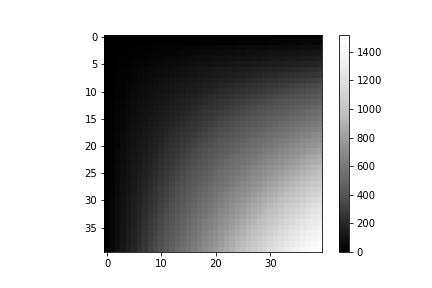
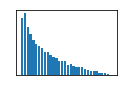

In [9]:
image1 = cle.create((40,40))
cle.set_ramp_x(image1)
image2 = cle.create((40,40))
cle.set_ramp_y(image2)

image = image1 * image2
image

cl.OCLArray([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3]], dtype=uint32)
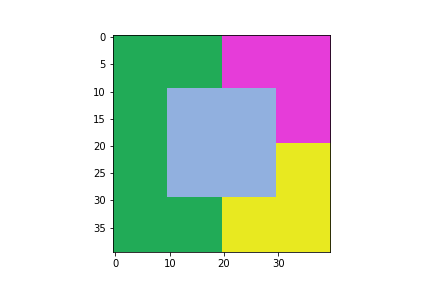

In [7]:
label_image = cle.scale(cle.asarray([
    [1, 1, 2, 2],
    [1, 4, 4, 2],
    [1, 4, 4, 3],
    [1, 1, 3, 3],
]), factor_x=10, factor_y=10, auto_size=True).astype(np.uint32)
label_image

In [12]:
statistics = cle.statistics_of_labelled_pixels(image, label_image)
statistics

{'label': array([1, 2, 3, 4]),
 'original_label': array([1, 2, 3, 4]),
 'bbox_min_x': array([ 0., 20., 20., 10.], dtype=float32),
 'bbox_min_y': array([ 0.,  0., 20., 10.], dtype=float32),
 'bbox_min_z': array([0., 0., 0., 0.], dtype=float32),
 'bbox_max_x': array([19., 39., 39., 29.], dtype=float32),
 'bbox_max_y': array([39., 19., 39., 29.], dtype=float32),
 'bbox_max_z': array([0., 0., 0., 0.], dtype=float32),
 'bbox_width': array([20., 20., 20., 20.], dtype=float32),
 'bbox_height': array([40., 20., 20., 20.], dtype=float32),
 'bbox_depth': array([1., 1., 1., 1.], dtype=float32),
 'min_intensity': array([  0.,   0., 600., 100.], dtype=float32),
 'max_intensity': array([ 741.,  741., 1521.,  841.], dtype=float32),
 'sum_intensity': array([ 91650.,  76575., 288075., 152100.], dtype=float32),
 'area': array([600., 300., 300., 400.], dtype=float32),
 'mean_intensity': array([152.75, 255.25, 960.25, 380.25], dtype=float32),
 'sum_intensity_times_x': array([1074450., 2550975., 9170475., 

In [13]:
table = pd.DataFrame(statistics)
table

,label,original_label,bbox_min_x,bbox_min_y,bbox_min_z,bbox_max_x,bbox_max_y,bbox_max_z,bbox_width,bbox_height,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
0,1,1,0.0,0.0,0.0,19.0,39.0,0.0,20.0,40.0,...,0.0,7803.059570,13.005099,9336.952148,15.561587,176.372299,22.470970,31.741825,1.727858,2.039755
1,2,2,20.0,0.0,0.0,39.0,19.0,0.0,20.0,20.0,...,0.0,2169.438965,7.231463,2461.590088,8.205300,198.254120,13.640220,17.950279,1.886232,2.187644
2,3,3,20.0,20.0,0.0,39.0,39.0,0.0,20.0,20.0,...,0.0,2169.438721,7.231462,2172.037842,7.240126,207.152573,13.640219,13.834440,1.886232,1.910801
3,4,4,10.0,10.0,0.0,29.0,29.0,0.0,20.0,20.0,...,0.0,3057.911133,7.644778,3159.964844,7.899912,162.456741,13.435029,15.846443,1.757413,2.005901


In [16]:
table.describe().T

,count,mean,std,min,25%,50%,75%,max
label,4.0,2.500000e+00,1.290994e+00,1.000000e+00,1.750000e+00,2.500000e+00,3.250000e+00,4.000000e+00
original_label,4.0,2.500000e+00,1.290994e+00,1.000000e+00,1.750000e+00,2.500000e+00,3.250000e+00,4.000000e+00
bbox_min_x,4.0,1.250000e+01,9.574271e+00,0.000000e+00,7.500000e+00,1.500000e+01,2.000000e+01,2.000000e+01
bbox_min_y,4.0,7.500000e+00,9.574271e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.250000e+01,2.000000e+01
bbox_min_z,4.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
bbox_max_x,4.0,3.150000e+01,9.574271e+00,1.900000e+01,2.650000e+01,3.400000e+01,3.900000e+01,3.900000e+01
bbox_max_y,4.0,3.150000e+01,9.574271e+00,1.900000e+01,2.650000e+01,3.400000e+01,3.900000e+01,3.900000e+01
bbox_max_z,4.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
bbox_width,4.0,2.000000e+01,0.000000e+00,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
bbox_height,4.0,2.500000e+01,1.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.500000e+01,4.000000e+01


In [17]:
table.keys()

Index(['label', 'original_label', 'bbox_min_x', 'bbox_min_y', 'bbox_min_z',
       'bbox_max_x', 'bbox_max_y', 'bbox_max_z', 'bbox_width', 'bbox_height',
       'bbox_depth', 'min_intensity', 'max_intensity', 'sum_intensity', 'area',
       'mean_intensity', 'sum_intensity_times_x', 'mass_center_x',
       'sum_intensity_times_y', 'mass_center_y', 'sum_intensity_times_z',
       'mass_center_z', 'sum_x', 'centroid_x', 'sum_y', 'centroid_y', 'sum_z',
       'centroid_z', 'sum_distance_to_centroid', 'mean_distance_to_centroid',
       'sum_distance_to_mass_center', 'mean_distance_to_mass_center',
       'standard_deviation_intensity', 'max_distance_to_centroid',
       'max_distance_to_mass_center', 'mean_max_distance_to_centroid_ratio',
       'mean_max_distance_to_mass_center_ratio'],
      dtype='object')

In [18]:
print("The last object had the label", 
     statistics["label"][-1]
     )

The last object had the label 4


In [21]:
print("The last object had the label", 
     table["label"].tolist()[-1]
     )

The last object had the label 4


In [23]:
print("The objects had area measurements of",
     table["area"].tolist()
     )

The objects had area measurements of [600.0, 300.0, 300.0, 400.0]


In [24]:
print("The average area of all objects was",
     np.mean(table["area"].tolist())
     )

The average area of all objects was 400.0


In [ ]:



'original_label', 'bbox_min_x', 'bbox_min_y', 'bbox_min_z',
       'bbox_max_x', 'bbox_max_y', 'bbox_max_z', 'bbox_width', 'bbox_height',
       'bbox_depth', 'min_intensity', 'max_intensity', 'sum_intensity', 'area',
       'mean_intensity', 'sum_intensity_times_x', 'mass_center_x',
       'sum_intensity_times_y', 'mass_center_y', 'sum_intensity_times_z',
       'mass_center_z', 'sum_x', 'centroid_x', 'sum_y', 'centroid_y', 'sum_z',
       'centroid_z', 'sum_distance_to_centroid', 'mean_distance_to_centroid',
       'sum_distance_to_mass_center', 'mean_distance_to_mass_center',
       'standard_deviation_intensity', 'max_distance_to_centroid',
       'max_distance_to_mass_center', 'mean_max_distance_to_centroid_ratio',
       'mean_max_distance_to_mass_center_ratio'

The column `original_label` can be used for debugging. If the label image was subsequently labeled, this column will be identical with `label`.

In [25]:
test_label_image = cle.asarray([
    [0, 1, 5, 6]
])

test_stats = cle.statistics_of_labelled_pixels(label_image=test_label_image)

print(test_stats["label"])
print(test_stats["original_label"])

[1 2 3 4 5 6]
[1 2 3 4 5 6]
